In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

train_data = pd.read_csv('train_21.csv')
test_data = pd.read_csv('test_21.csv')
x = train_data['x']
y = train_data['y']
c = train_data['label']
tx = test_data['x']
ty = test_data['y']
tc = test_data['label']

The code is broken down in 6 parts for 6 subquestions,please run the codes in order.

In [ ]:
def predict(a,meanmat,covarmat,probclass,classes):
    ans=np.array([])
    for i in range(len(a)):
        p=np.array([[a[i][0]],[a[i][1]]])
        prob=[]
        for j in range(0,classes):
            if(j==0):
                expo=np.exp(-0.5*(p-meanmat[j]).T.dot(np.linalg.inv(covarmat[j])).dot(p-meanmat[j]))
                prob.append(probclass[j]*expo/(np.sqrt(np.linalg.det(covarmat[j]))*2*np.pi))
            elif(j==1):
                expo=np.exp(-0.5*(p-meanmat[j]).T.dot(np.linalg.inv(covarmat[j])).dot(p-meanmat[j]))
                prob.append(probclass[j]*expo/(np.sqrt(np.linalg.det(covarmat[j]))*2*np.pi))
            else:
                expo=np.exp(-0.5*(p-meanmat[j]).T.dot(np.linalg.inv(covarmat[j])).dot(p-meanmat[j]))
                prob.append(probclass[j]*expo/(np.sqrt(np.linalg.det(covarmat[j]))*2*np.pi))

        ans=np.append(ans,prob.index(max(prob)))
    return ans

Question-2 part-a

Accuracy on training data is  100.0
Accuracy on test data is  99.0


[Text(0.5, 24.0, 'Output Class'),
 Text(373.36363636363626, 0.5, 'Target Class')]

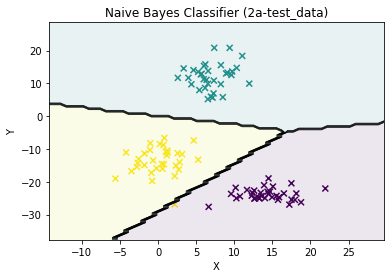

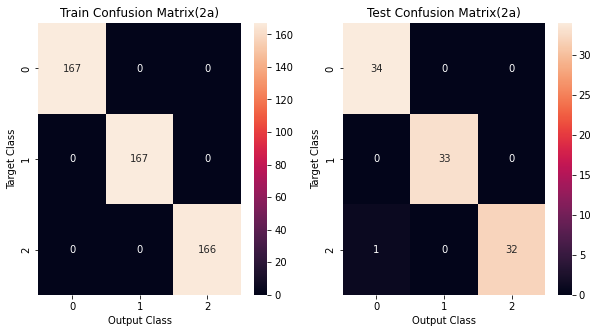

In [ ]:
#2a covar=I

dx1=[]
dx2=[]
dx3=[]
dy1=[]
dy2=[]
dy3=[]

for i in range(0,len(x)):
    if(c[i]==0):
        dx1.append(x[i])
        dy1.append(y[i])
    elif(c[i]==1):
        dx2.append(x[i])
        dy2.append(y[i])
    else:
        dx3.append(x[i])
        dy3.append(y[i])


probclass=[len(dx1)/len(x),len(dx2)/len(x),len(dx3)/len(x)]

xmean1=sum(dx1)/len(dx1)
xmean2=sum(dx2)/len(dx2)
xmean3=sum(dx3)/len(dx3)
ymean1=sum(dy1)/len(dy1)
ymean2=sum(dy2)/len(dy2)
ymean3=sum(dy3)/len(dy3)

meanmat1=np.array([[xmean1],[ymean1]])
meanmat2=np.array([[xmean2],[ymean2]])
meanmat3=np.array([[xmean3],[ymean3]])

#meantmat here
meanmatlist=[meanmat1,meanmat2,meanmat3]

covarmat=np.array([[1,0],[0,1]])

#list of covarmatrices
covarmatlist=[covarmat,covarmat,covarmat]
predic=[]
tpredic=[]

acctrain=0
acctest=0

for i in range(len(x)):
    p=np.array([[x[i]],[y[i]]])
    prob=[]
    for j in range(0,3):
        if(j==0):
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat1).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat1))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))
        elif(j==1):
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat2).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat2))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))
        else:
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat3).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat3))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))

    if(prob.index(max(prob))==c[i]):
        acctrain+=1

    predic.append(prob.index(max(prob)))

print("Accuracy on training data is ",acctrain/len(x)*100)

for i in range(len(tx)):
    p=np.array([[tx[i]],[ty[i]]])
    prob=[]
    for j in range(0,3):
        if(j==0):
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat1).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat1))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))
        elif(j==1):
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat2).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat2))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))
        else:
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat3).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat3))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))

    if(prob.index(max(prob))==tc[i]):
        acctest+=1

    tpredic.append(prob.index(max(prob)))

print("Accuracy on test data is ",acctest/len(tx)*100)


#plotting the test data
plt.scatter(tx, ty, c=tc, marker='x')
plt.title("Naive Bayes Classifier (2a-test_data)")
plt.xlabel("X")
plt.ylabel("Y")

deltaX = x.max() - x.min()
deltaY = y.max() - y.min()
delta = min(deltaX, deltaY)

step = delta / 40
x_min = min(x.min(), tx.min()) - 10 * step
x_max = max(x.max(), tx.max()) + 10 * step
y_min = min(y.min(), ty.min()) - 10 * step
y_max = max(y.max(), ty.max()) + 10 * step


Xs, Ys = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
#print(np.c_[Xs.ravel(), Ys.ravel()].shape)
Z = predict(np.c_[Xs.ravel(), Ys.ravel()], meanmatlist, covarmatlist, probclass,3)
Z = Z.reshape(Xs.shape)
plt.contourf(Xs, Ys, Z, alpha=0.1)
plt.contour(Xs, Ys, Z, colors='k', linewidths=.7)

 # PLOTTING THE CONFUSION MATRIX
confusionMatrix_train = np.zeros((3, 3))
confusionMatrix_test = np.zeros((3, 3))

for i in range(len(x)):
    predicted = predict(np.c_[x[i],y[i]], meanmatlist, covarmatlist, probclass,3)
    #print(predicted.shape)
    actual = int(c[i])
    #print(actual,predicted[0])
    confusionMatrix_train[actual][int(predicted[0])] += 1

for i in range(len(tx)):
    predicted = predict(np.c_[tx[i],ty[i]], meanmatlist, covarmatlist, probclass,3)
    actual = int(tc[i])
    confusionMatrix_test[actual][int(predicted[0])] += 1


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title("Train Confusion Matrix(2a)")
ax2.set_title("Test Confusion Matrix(2a)")



s1 = sns.heatmap(confusionMatrix_train, annot=True, ax=ax1, fmt='g')
s2 = sns.heatmap(confusionMatrix_test, annot=True, ax=ax2, fmt='g')

s1.set(xlabel='Output Class', ylabel='Target Class')
s2.set(xlabel='Output Class', ylabel='Target Class')

Question-2 part-c

Accuracy on training data is  99.8
Accuracy on test data is  100.0


[Text(0.5, 24.0, 'Output Class'),
 Text(373.36363636363626, 0.5, 'Target Class')]

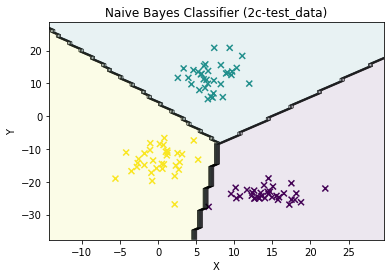

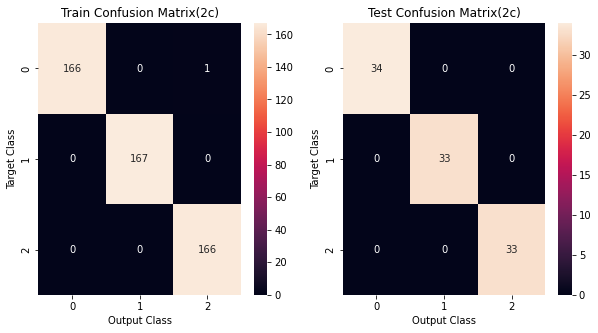

In [ ]:
#2c same covar

dx1=[]
dx2=[]
dx3=[]
dy1=[]
dy2=[]
dy3=[]

for i in range(0,len(x)):
    if(c[i]==0):
        dx1.append(x[i])
        dy1.append(y[i])
    elif(c[i]==1):
        dx2.append(x[i])
        dy2.append(y[i])
    else:
        dx3.append(x[i])
        dy3.append(y[i])


probclass=[len(dx1)/len(x),len(dx2)/len(x),len(dx3)/len(x)]

xmean1=sum(dx1)/len(dx1)
xmean2=sum(dx2)/len(dx2)
xmean3=sum(dx3)/len(dx3)
ymean1=sum(dy1)/len(dy1)
ymean2=sum(dy2)/len(dy2)
ymean3=sum(dy3)/len(dy3)

meanmat1=np.array([[xmean1],[ymean1]])
meanmat2=np.array([[xmean2],[ymean2]])
meanmat3=np.array([[xmean3],[ymean3]])

meanmatlist=[meanmat1,meanmat2,meanmat3]

n=x.__len__()
#print(n)
mean1=0
mean2=0
sqsum1=0
sqsum2=0
#print(type(x[0]))
for i in range(n):
    mean1+=x[i]
    mean2+=y[i]
    sqsum1+=x[i]*x[i]
    sqsum2+=y[i]*y[i]
mean1/=n
mean2/=n
sqsum1/=n
sqsum2/=n

#meanmat=np.array([mean1,mean2])
covarmat=np.array([[sqsum1-mean1*mean1,0],[0,sqsum2-mean2*mean2]])
covarmatlist=[covarmat,covarmat,covarmat]
#print(covarmat)

predic=[]
tpredic=[]

acctrain=0
acctest=0

for i in range(len(x)):
    p=np.array([[x[i]],[y[i]]])
    prob=[]
    for j in range(0,3):
        if(j==0):
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat1).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat1))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))
        elif(j==1):
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat2).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat2))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))
        else:
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat3).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat3))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))

    if(prob.index(max(prob))==c[i]):
        acctrain+=1

    predic.append(prob.index(max(prob)))

print("Accuracy on training data is ",acctrain/len(x)*100)

for i in range(len(tx)):
    p=np.array([[tx[i]],[ty[i]]])
    prob=[]
    for j in range(0,3):
        if(j==0):
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat1).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat1))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))
        elif(j==1):
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat2).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat2))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))
        else:
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat3).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat3))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))

    if(prob.index(max(prob))==tc[i]):
        acctest+=1

    tpredic.append(prob.index(max(prob)))

print("Accuracy on test data is ",acctest/len(tx)*100)

#plotting the test data
plt.scatter(tx, ty, c=tc, marker='x')
plt.title("Naive Bayes Classifier (2c-test_data)")
plt.xlabel("X")
plt.ylabel("Y")

deltaX = x.max() - x.min()
deltaY = y.max() - y.min()
delta = min(deltaX, deltaY)

step = delta / 40
x_min = min(x.min(), tx.min()) - 10 * step
x_max = max(x.max(), tx.max()) + 10 * step
y_min = min(y.min(), ty.min()) - 10 * step
y_max = max(y.max(), ty.max()) + 10 * step


Xs, Ys = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
#print(np.c_[Xs.ravel(), Ys.ravel()].shape)
Z = predict(np.c_[Xs.ravel(), Ys.ravel()], meanmatlist, covarmatlist, probclass,3)
Z = Z.reshape(Xs.shape)
plt.contourf(Xs, Ys, Z, alpha=0.1)
plt.contour(Xs, Ys, Z, colors='k', linewidths=.7)

 # PLOTTING THE CONFUSION MATRIX
confusionMatrix_train = np.zeros((3, 3))
confusionMatrix_test = np.zeros((3, 3))

for i in range(len(x)):
    predicted = predict(np.c_[x[i],y[i]], meanmatlist, covarmatlist, probclass,3)
    #print(predicted.shape)
    actual = int(c[i])
    #print(actual,predicted[0])
    confusionMatrix_train[actual][int(predicted[0])] += 1

for i in range(len(tx)):
    predicted = predict(np.c_[tx[i],ty[i]], meanmatlist, covarmatlist, probclass,3)
    actual = int(tc[i])
    confusionMatrix_test[actual][int(predicted[0])] += 1


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title("Train Confusion Matrix(2c)")
ax2.set_title("Test Confusion Matrix(2c)")



s1 = sns.heatmap(confusionMatrix_train, annot=True, ax=ax1, fmt='g')
s2 = sns.heatmap(confusionMatrix_test, annot=True, ax=ax2, fmt='g')

s1.set(xlabel='Output Class', ylabel='Target Class')
s2.set(xlabel='Output Class', ylabel='Target Class')

Question-2 part-e

Accuracy on training data is  100.0
Accuracy on test data is  100.0


[Text(0.5, 24.0, 'Output Class'),
 Text(373.36363636363626, 0.5, 'Target Class')]

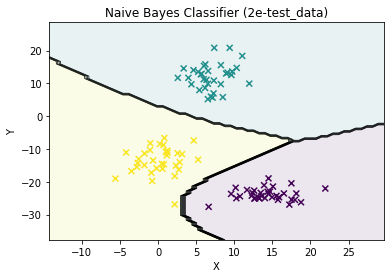

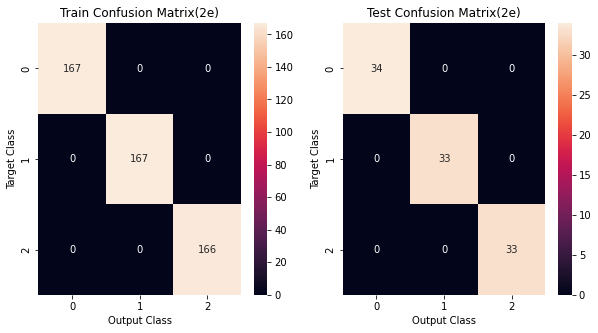

In [ ]:
#2e diff covar

dx1=[]
dx2=[]
dx3=[]
dy1=[]
dy2=[]
dy3=[]

for i in range(0,len(x)):
    if(c[i]==0):
        dx1.append(x[i])
        dy1.append(y[i])
    elif(c[i]==1):
        dx2.append(x[i])
        dy2.append(y[i])
    else:
        dx3.append(x[i])
        dy3.append(y[i])


probclass=[len(dx1)/len(x),len(dx2)/len(x),len(dx3)/len(x)]

xmean1=sum(dx1)/len(dx1)
xmean2=sum(dx2)/len(dx2)
xmean3=sum(dx3)/len(dx3)
ymean1=sum(dy1)/len(dy1)
ymean2=sum(dy2)/len(dy2)
ymean3=sum(dy3)/len(dy3)

meanmat1=np.array([[xmean1],[ymean1]])
meanmat2=np.array([[xmean2],[ymean2]])
meanmat3=np.array([[xmean3],[ymean3]])

meanmatlist=[meanmat1,meanmat2,meanmat3]

xvar1=np.var(dx1)
xvar2=np.var(dx2)
xvar3=np.var(dx3)
yvar1=np.var(dy1)
yvar2=np.var(dy2)
yvar3=np.var(dy3)

covarmat1=np.array([[xvar1,0],[0,yvar1]])
covarmat2=np.array([[xvar2,0],[0,yvar2]])
covarmat3=np.array([[xvar3,0],[0,yvar3]])

covarmatlist=[covarmat1,covarmat2,covarmat3]

covdet1=np.linalg.det(covarmat1)
covdet2=np.linalg.det(covarmat2)
covdet3=np.linalg.det(covarmat3)

covinv1=np.linalg.inv(covarmat1)
covinv2=np.linalg.inv(covarmat2)
covinv3=np.linalg.inv(covarmat3)

predic=[]
tpredic=[]

acctrain=0
acctest=0

for i in range(len(x)):
    p=np.array([[x[i]],[y[i]]])
    prob=[]
    for j in range(0,3):
        if(j==0):
            expo=np.exp(-0.5*(p-meanmat1).T.dot(covinv1).dot(p-meanmat1))
            prob.append(probclass[j]*expo/(np.sqrt(covdet1)*2*np.pi))
        elif(j==1):
            expo=np.exp(-0.5*(p-meanmat2).T.dot(covinv2).dot(p-meanmat2))
            prob.append(probclass[j]*expo/(np.sqrt(covdet2)*2*np.pi))
        else:
            expo=np.exp(-0.5*(p-meanmat3).T.dot(covinv3).dot(p-meanmat3))
            prob.append(probclass[j]*expo/(np.sqrt(covdet3)*2*np.pi))

    if(prob.index(max(prob))==c[i]):
        acctrain+=1

    predic.append(prob.index(max(prob)))

print("Accuracy on training data is ",acctrain/len(x)*100)

for i in range(len(tx)):
    p=np.array([[tx[i]],[ty[i]]])
    prob=[]
    for j in range(0,3):
        if(j==0):
            expo=np.exp(-0.5*(p-meanmat1).T.dot(covinv1).dot(p-meanmat1))
            prob.append(probclass[j]*expo/(np.sqrt(covdet1)*2*np.pi))
        elif(j==1):
            expo=np.exp(-0.5*(p-meanmat2).T.dot(covinv2).dot(p-meanmat2))
            prob.append(probclass[j]*expo/(np.sqrt(covdet2)*2*np.pi))
        else:
            expo=np.exp(-0.5*(p-meanmat3).T.dot(covinv3).dot(p-meanmat3))
            prob.append(probclass[j]*expo/(np.sqrt(covdet3)*2*np.pi))

    if(prob.index(max(prob))==tc[i]):
        acctest+=1

    tpredic.append(prob.index(max(prob)))

print("Accuracy on test data is ",acctest/len(tx)*100)

#plotting the test data
plt.scatter(tx, ty, c=tc, marker='x')
plt.title("Naive Bayes Classifier (2e-test_data)")
plt.xlabel("X")
plt.ylabel("Y")

deltaX = x.max() - x.min()
deltaY = y.max() - y.min()
delta = min(deltaX, deltaY)

step = delta / 40
x_min = min(x.min(), tx.min()) - 10 * step
x_max = max(x.max(), tx.max()) + 10 * step
y_min = min(y.min(), ty.min()) - 10 * step
y_max = max(y.max(), ty.max()) + 10 * step


Xs, Ys = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
#print(np.c_[Xs.ravel(), Ys.ravel()].shape)
Z = predict(np.c_[Xs.ravel(), Ys.ravel()], meanmatlist, covarmatlist, probclass,3)
Z = Z.reshape(Xs.shape)
plt.contourf(Xs, Ys, Z, alpha=0.1)
plt.contour(Xs, Ys, Z, colors='k', linewidths=.7)

 # PLOTTING THE CONFUSION MATRIX
confusionMatrix_train = np.zeros((3, 3))
confusionMatrix_test = np.zeros((3, 3))

for i in range(len(x)):
    predicted = predict(np.c_[x[i],y[i]], meanmatlist, covarmatlist, probclass,3)
    #print(predicted.shape)
    actual = int(c[i])
    #print(actual,predicted[0])
    confusionMatrix_train[actual][int(predicted[0])] += 1

for i in range(len(tx)):
    predicted = predict(np.c_[tx[i],ty[i]], meanmatlist, covarmatlist, probclass,3)
    actual = int(tc[i])
    confusionMatrix_test[actual][int(predicted[0])] += 1


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title("Train Confusion Matrix(2e)")
ax2.set_title("Test Confusion Matrix(2e)")



s1 = sns.heatmap(confusionMatrix_train, annot=True, ax=ax1, fmt='g')
s2 = sns.heatmap(confusionMatrix_test, annot=True, ax=ax2, fmt='g')

s1.set(xlabel='Output Class', ylabel='Target Class')
s2.set(xlabel='Output Class', ylabel='Target Class')

Please run this code to further run the codes down below

In [ ]:
#dataset3
train_data = pd.read_csv('train_21_d3.csv')
test_data = pd.read_csv('test_21_d3.csv')
#col1=tx.tolist()
x = train_data['x']
y = train_data['y']
c = train_data['label']
tx = test_data['x']
ty = test_data['y']
tc = test_data['label']


Question-2 part-b

Accuracy on training data is  79.2
Accuracy on test data is  76.0


[Text(0.5, 24.0, 'Output Class'),
 Text(373.36363636363626, 0.5, 'Target Class')]

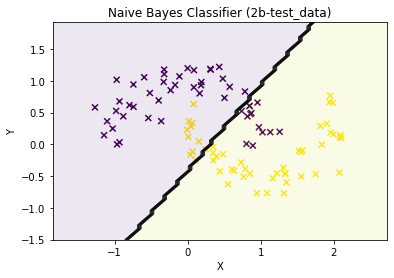

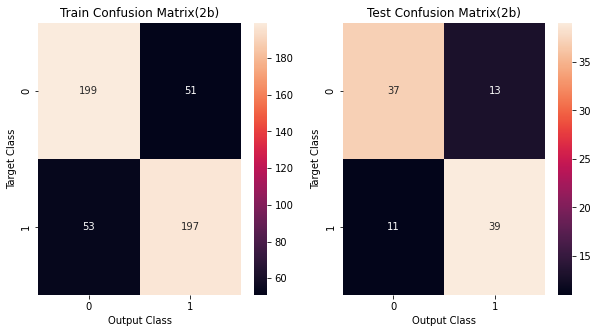

In [ ]:
#2b covar=I

dx1=[]
dx2=[]
dy1=[]
dy2=[]
#print(x)
for i in range(0,len(x)):
    if(c[i]==0):
        dx1.append(x[i])
        dy1.append(y[i])
    elif(c[i]==1):
        dx2.append(x[i])
        dy2.append(y[i])


probclass=[len(dx1)/len(x),len(dx2)/len(x)]

xmean1=sum(dx1)/len(dx1)
xmean2=sum(dx2)/len(dx2)
ymean1=sum(dy1)/len(dy1)
ymean2=sum(dy2)/len(dy2)

meanmat1=np.array([[xmean1],[ymean1]])
meanmat2=np.array([[xmean2],[ymean2]])

meanmatlist=[meanmat1,meanmat2]

covarmat=np.array([[1,0],[0,1]])
covarmatlist=[covarmat,covarmat]
predic=[]
tpredic=[]

acctrain=0
acctest=0

for i in range(len(x)):
    p=np.array([[x[i]],[y[i]]])
    prob=[]
    for j in range(0,3):
        if(j==0):
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat1).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat1))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))
        elif(j==1):
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat2).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat2))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))

    if(prob.index(max(prob))==c[i]):
        acctrain+=1

    predic.append(prob.index(max(prob)))

print("Accuracy on training data is ",acctrain/len(x)*100)

for i in range(len(tx)):
    p=np.array([[tx[i]],[ty[i]]])
    prob=[]
    for j in range(0,3):
        if(j==0):
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat1).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat1))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))
        elif(j==1):
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat2).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat2))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))

    if(prob.index(max(prob))==tc[i]):
        acctest+=1

    tpredic.append(prob.index(max(prob)))

print("Accuracy on test data is ",acctest/len(tx)*100)

#plotting the test data
plt.scatter(tx, ty, c=tc, marker='x')
plt.title("Naive Bayes Classifier (2b-test_data)")
plt.xlabel("X")
plt.ylabel("Y")

deltaX = x.max() - x.min()
deltaY = y.max() - y.min()
delta = min(deltaX, deltaY)

step = delta / 40
x_min = min(x.min(), tx.min()) - 10 * step
x_max = max(x.max(), tx.max()) + 10 * step
y_min = min(y.min(), ty.min()) - 10 * step
y_max = max(y.max(), ty.max()) + 10 * step


Xs, Ys = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
#print(np.c_[Xs.ravel(), Ys.ravel()].shape)
Z = predict(np.c_[Xs.ravel(), Ys.ravel()], meanmatlist, covarmatlist, probclass,2)
Z = Z.reshape(Xs.shape)
plt.contourf(Xs, Ys, Z, alpha=0.1)
plt.contour(Xs, Ys, Z, colors='k', linewidths=.7)

 # PLOTTING THE CONFUSION MATRIX
confusionMatrix_train = np.zeros((2,2))
confusionMatrix_test = np.zeros((2,2))

for i in range(len(x)):
    predicted = predict(np.c_[x[i],y[i]], meanmatlist, covarmatlist, probclass,2)
    #print(predicted.shape)
    actual = int(c[i])
    #print(actual,predicted[0])
    confusionMatrix_train[actual][int(predicted[0])] += 1

for i in range(len(tx)):
    predicted = predict(np.c_[tx[i],ty[i]], meanmatlist, covarmatlist, probclass,2)
    actual = int(tc[i])
    confusionMatrix_test[actual][int(predicted[0])] += 1


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title("Train Confusion Matrix(2b)")
ax2.set_title("Test Confusion Matrix(2b)")



s1 = sns.heatmap(confusionMatrix_train, annot=True, ax=ax1, fmt='g')
s2 = sns.heatmap(confusionMatrix_test, annot=True, ax=ax2, fmt='g')

s1.set(xlabel='Output Class', ylabel='Target Class')
s2.set(xlabel='Output Class', ylabel='Target Class')

Question-2 part-d

Accuracy on training data is  86.0
Accuracy on test data is  88.0


[Text(0.5, 24.0, 'Output Class'),
 Text(373.36363636363626, 0.5, 'Target Class')]

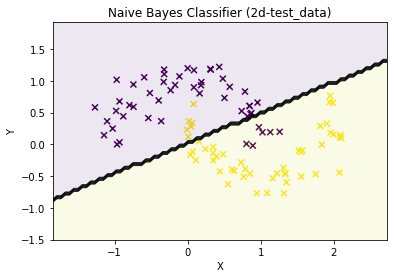

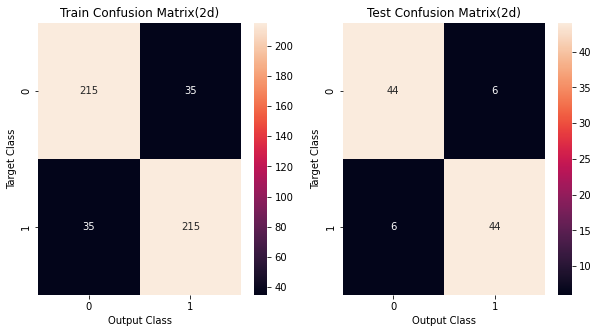

In [ ]:
#2d same covar

dx1=[]
dx2=[]
dy1=[]
dy2=[]

for i in range(0,len(x)):
    if(c[i]==0):
        dx1.append(x[i])
        dy1.append(y[i])
    elif(c[i]==1):
        dx2.append(x[i])
        dy2.append(y[i])


probclass=[len(dx1)/len(x),len(dx2)/len(x)]

xmean1=sum(dx1)/len(dx1)
xmean2=sum(dx2)/len(dx2)
ymean1=sum(dy1)/len(dy1)
ymean2=sum(dy2)/len(dy2)

meanmat1=np.array([[xmean1],[ymean1]])
meanmat2=np.array([[xmean2],[ymean2]])

meanmatlist=[meanmat1,meanmat2]

n=x.__len__()
#print(n)
mean1=0
mean2=0
sqsum1=0
sqsum2=0
#print(type(x[0]))
for i in range(n):
    mean1+=x[i]
    mean2+=y[i]
    sqsum1+=x[i]*x[i]
    sqsum2+=y[i]*y[i]
mean1/=n
mean2/=n
sqsum1/=n
sqsum2/=n

#meanmat=np.array([mean1,mean2])
covarmat=np.array([[sqsum1-mean1*mean1,0],[0,sqsum2-mean2*mean2]])

covarmatlist=[covarmat,covarmat]
#print(covarmat)

predic=[]
tpredic=[]

acctrain=0
acctest=0

for i in range(len(x)):
    p=np.array([[x[i]],[y[i]]])
    prob=[]
    for j in range(0,3):
        if(j==0):
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat1).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat1))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))
        elif(j==1):
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat2).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat2))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))

    if(prob.index(max(prob))==c[i]):
        acctrain+=1

    predic.append(prob.index(max(prob)))

print("Accuracy on training data is ",acctrain/len(x)*100)

for i in range(len(tx)):
    p=np.array([[tx[i]],[ty[i]]])
    prob=[]
    for j in range(0,3):
        if(j==0):
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat1).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat1))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))
        elif(j==1):
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat2).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat2))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))

    if(prob.index(max(prob))==tc[i]):
        acctest+=1

    tpredic.append(prob.index(max(prob)))

print("Accuracy on test data is ",acctest/len(tx)*100)

#plotting the test data
plt.scatter(tx, ty, c=tc, marker='x')
plt.title("Naive Bayes Classifier (2d-test_data)")
plt.xlabel("X")
plt.ylabel("Y")

deltaX = x.max() - x.min()
deltaY = y.max() - y.min()
delta = min(deltaX, deltaY)

step = delta / 40
x_min = min(x.min(), tx.min()) - 10 * step
x_max = max(x.max(), tx.max()) + 10 * step
y_min = min(y.min(), ty.min()) - 10 * step
y_max = max(y.max(), ty.max()) + 10 * step


Xs, Ys = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
#print(np.c_[Xs.ravel(), Ys.ravel()].shape)
Z = predict(np.c_[Xs.ravel(), Ys.ravel()], meanmatlist, covarmatlist, probclass,2)
Z = Z.reshape(Xs.shape)
plt.contourf(Xs, Ys, Z, alpha=0.1)
plt.contour(Xs, Ys, Z, colors='k', linewidths=.7)

 # PLOTTING THE CONFUSION MATRIX
confusionMatrix_train = np.zeros((2,2))
confusionMatrix_test = np.zeros((2,2))

for i in range(len(x)):
    predicted = predict(np.c_[x[i],y[i]], meanmatlist, covarmatlist, probclass,2)
    #print(predicted.shape)
    actual = int(c[i])
    #print(actual,predicted[0])
    confusionMatrix_train[actual][int(predicted[0])] += 1

for i in range(len(tx)):
    predicted = predict(np.c_[tx[i],ty[i]], meanmatlist, covarmatlist, probclass,2)
    actual = int(tc[i])
    confusionMatrix_test[actual][int(predicted[0])] += 1


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title("Train Confusion Matrix(2d)")
ax2.set_title("Test Confusion Matrix(2d)")



s1 = sns.heatmap(confusionMatrix_train, annot=True, ax=ax1, fmt='g')
s2 = sns.heatmap(confusionMatrix_test, annot=True, ax=ax2, fmt='g')

s1.set(xlabel='Output Class', ylabel='Target Class')
s2.set(xlabel='Output Class', ylabel='Target Class')

Question-2 part-f

Accuracy on training data is  87.4
Accuracy on test data is  87.0


[Text(0.5, 24.0, 'Output Class'),
 Text(373.36363636363626, 0.5, 'Target Class')]

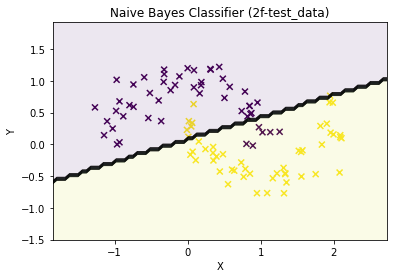

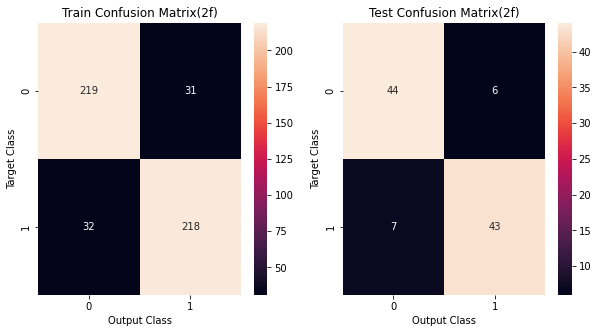

In [ ]:
#2f diff covar

dx1=[]
dx2=[]
dy1=[]
dy2=[]

for i in range(0,len(x)):
    if(c[i]==0):
        dx1.append(x[i])
        dy1.append(y[i])
    elif(c[i]==1):
        dx2.append(x[i])
        dy2.append(y[i])


probclass=[len(dx1)/len(x),len(dx2)/len(x)]

xmean1=sum(dx1)/len(dx1)
xmean2=sum(dx2)/len(dx2)
ymean1=sum(dy1)/len(dy1)
ymean2=sum(dy2)/len(dy2)

meanmat1=np.array([[xmean1],[ymean1]])
meanmat2=np.array([[xmean2],[ymean2]])

meanmatlist=[meanmat1,meanmat2]

xvar1=np.var(dx1)
xvar2=np.var(dx2)
yvar1=np.var(dy1)
yvar2=np.var(dy2)

covarmat1=np.array([[xvar1,0],[0,yvar1]])
covarmat2=np.array([[xvar2,0],[0,yvar2]])

covarmatlist=[covarmat1,covarmat2]

covdet1=np.linalg.det(covarmat1)
covdet2=np.linalg.det(covarmat2)

covinv1=np.linalg.inv(covarmat1)
covinv2=np.linalg.inv(covarmat2)

predic=[]
tpredic=[]

acctrain=0
acctest=0

for i in range(len(x)):
    p=np.array([[x[i]],[y[i]]])
    prob=[]
    for j in range(0,3):
        if(j==0):
            expo=np.exp(-0.5*(p-meanmat1).T.dot(covinv1).dot(p-meanmat1))
            prob.append(probclass[j]*expo/(np.sqrt(covdet1)*2*np.pi))
        elif(j==1):
            expo=np.exp(-0.5*(p-meanmat2).T.dot(covinv2).dot(p-meanmat2))
            prob.append(probclass[j]*expo/(np.sqrt(covdet2)*2*np.pi))

    if(prob.index(max(prob))==c[i]):
        acctrain+=1

    predic.append(prob.index(max(prob)))

print("Accuracy on training data is ",acctrain/len(x)*100)

for i in range(len(tx)):
    p=np.array([[tx[i]],[ty[i]]])
    prob=[]
    for j in range(0,3):
        if(j==0):
            expo=np.exp(-0.5*(p-meanmat1).T.dot(covinv1).dot(p-meanmat1))
            prob.append(probclass[j]*expo/(np.sqrt(covdet1)*2*np.pi))
        elif(j==1):
            expo=np.exp(-0.5*(p-meanmat2).T.dot(covinv2).dot(p-meanmat2))
            prob.append(probclass[j]*expo/(np.sqrt(covdet2)*2*np.pi))

    if(prob.index(max(prob))==tc[i]):
        acctest+=1

    tpredic.append(prob.index(max(prob)))

print("Accuracy on test data is ",acctest/len(tx)*100)

#plotting the test data
plt.scatter(tx, ty, c=tc, marker='x')
plt.title("Naive Bayes Classifier (2f-test_data)")
plt.xlabel("X")
plt.ylabel("Y")

deltaX = x.max() - x.min()
deltaY = y.max() - y.min()
delta = min(deltaX, deltaY)

step = delta / 40
x_min = min(x.min(), tx.min()) - 10 * step
x_max = max(x.max(), tx.max()) + 10 * step
y_min = min(y.min(), ty.min()) - 10 * step
y_max = max(y.max(), ty.max()) + 10 * step


Xs, Ys = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
#print(np.c_[Xs.ravel(), Ys.ravel()].shape)
Z = predict(np.c_[Xs.ravel(), Ys.ravel()], meanmatlist, covarmatlist, probclass,2)
Z = Z.reshape(Xs.shape)
plt.contourf(Xs, Ys, Z, alpha=0.1)
plt.contour(Xs, Ys, Z, colors='k', linewidths=.7)

 # PLOTTING THE CONFUSION MATRIX
confusionMatrix_train = np.zeros((2,2))
confusionMatrix_test = np.zeros((2,2))

for i in range(len(x)):
    predicted = predict(np.c_[x[i],y[i]], meanmatlist, covarmatlist, probclass,2)
    #print(predicted.shape)
    actual = int(c[i])
    #print(actual,predicted[0])
    confusionMatrix_train[actual][int(predicted[0])] += 1

for i in range(len(tx)):
    predicted = predict(np.c_[tx[i],ty[i]], meanmatlist, covarmatlist, probclass,2)
    actual = int(tc[i])
    confusionMatrix_test[actual][int(predicted[0])] += 1


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title("Train Confusion Matrix(2f)")
ax2.set_title("Test Confusion Matrix(2f)")



s1 = sns.heatmap(confusionMatrix_train, annot=True, ax=ax1, fmt='g')
s2 = sns.heatmap(confusionMatrix_test, annot=True, ax=ax2, fmt='g')

s1.set(xlabel='Output Class', ylabel='Target Class')
s2.set(xlabel='Output Class', ylabel='Target Class')